In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Titanic Dataset

In [3]:
dataset = sns.load_dataset('titanic')

In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Data Cleaning

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
dataset.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
dataset = dataset.drop(columns=["deck"])

In [8]:
dataset = dataset.dropna()

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


In [10]:
dataset = dataset.astype({"adult_male":'int','alone':'int'})

### Distribution of price of tickets

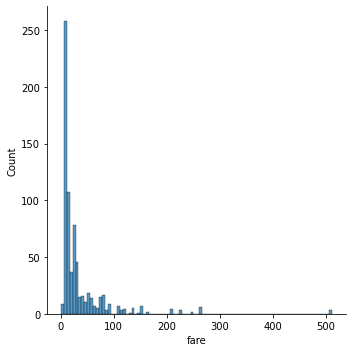

In [11]:
sns.displot(dataset['fare'])

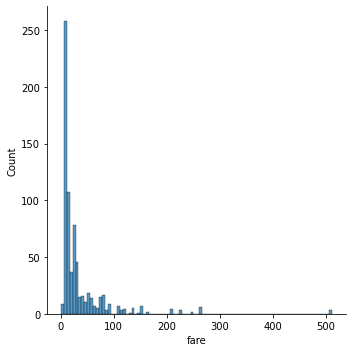

In [23]:
sns.displot(dataset['fare'], kde=False)

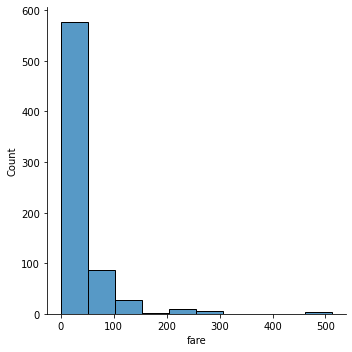

In [24]:
sns.displot(dataset['fare'], kde=False, bins=10)

Most tickets sold are between 0-50 dollars

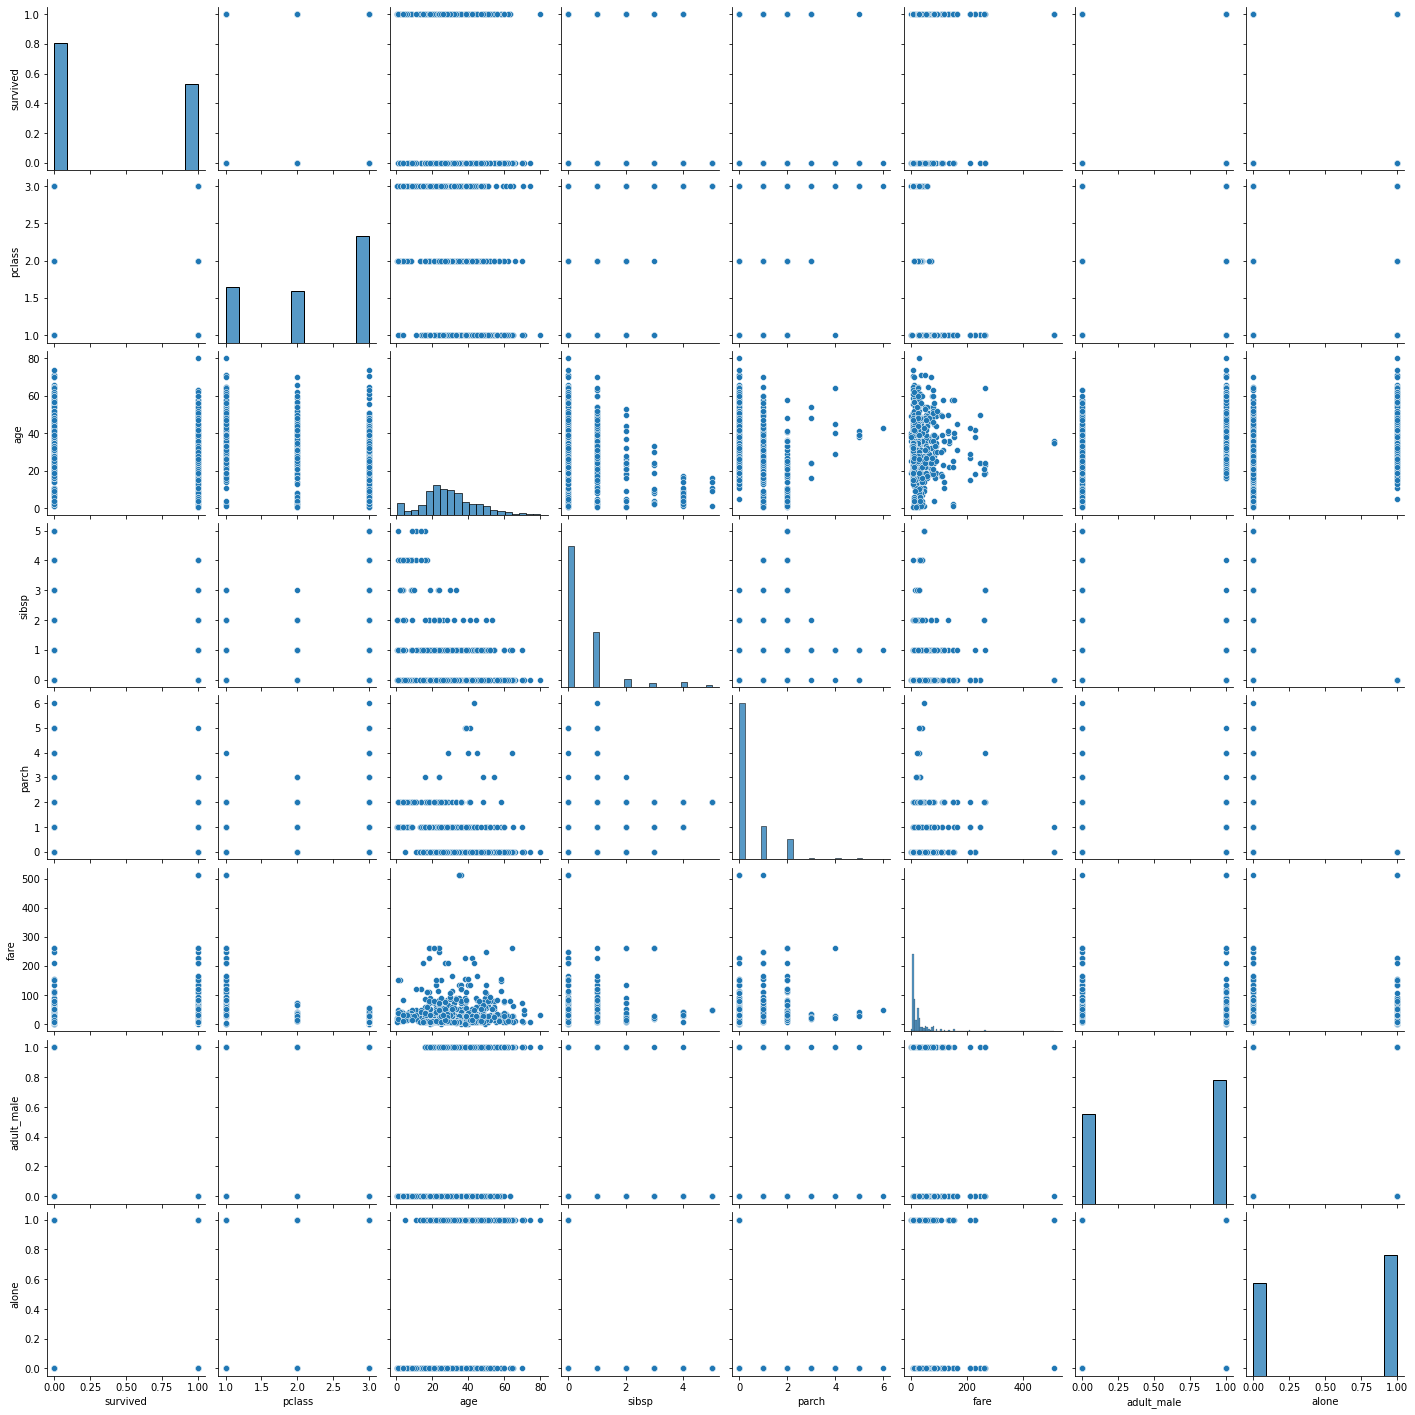

In [14]:
sns.pairplot(dataset)

### Joint Plot to see relationship between age and fare

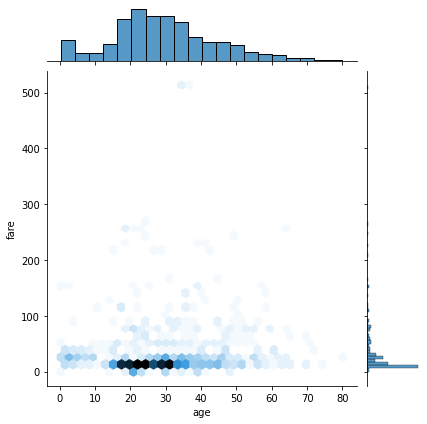

In [15]:
sns.jointplot(x='age', y='fare', data=dataset, kind='hex')

 most of the passengers are between age 20 and 30 and most of them paid between 10-50 for the tickets.

### Joint plot between fare and survived

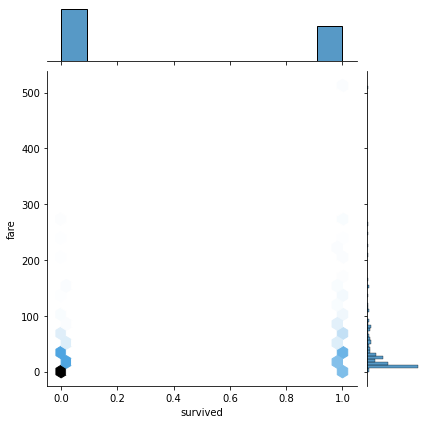

In [16]:
sns.jointplot(y='fare',x='survived',data=dataset,kind="hex")

Most of the expensive ticket holders survived

### Relation between Age and Gender

<AxesSubplot:xlabel='sex', ylabel='age'>

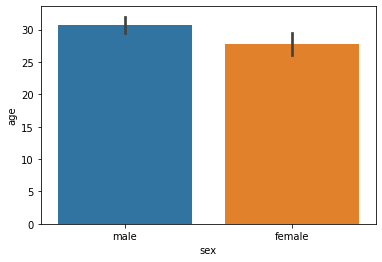

In [17]:
sns.barplot(x='sex', y='age', data=dataset)

The barplot() is used to display the mean value for each value in a categorical column, against a numeric column.
Mean Age for men is around 30
Mean Age for women is around 25

#### Box plot for distribution of age with respect to each gender

<AxesSubplot:xlabel='sex', ylabel='age'>

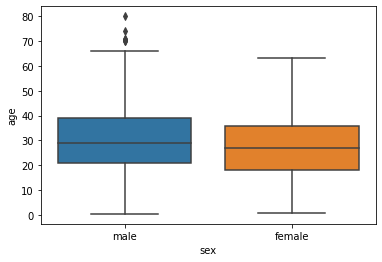

In [18]:
sns.boxplot(x='sex', y='age', data=dataset)

Median age of men is just below 30. Range of age is from 2 to 80  
Median age of women is around 26. Range of age is from 2 to 65

#### Box plot for distribution of age with respect to each gender along with the information about whether they survived or not

<AxesSubplot:xlabel='sex', ylabel='age'>

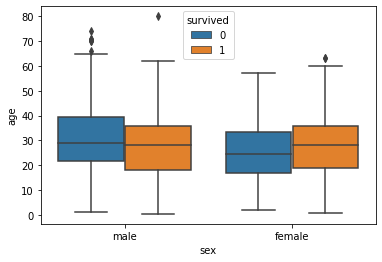

In [19]:
sns.boxplot(x='sex', y='age', data=dataset, hue="survived")

Among male passengers younger people survived while on the other hand older people survived in the female population. 

<AxesSubplot:xlabel='sex', ylabel='age'>

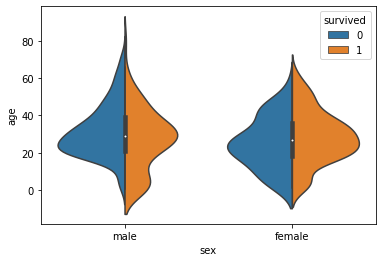

In [20]:
sns.violinplot(x='sex', y='age', data=dataset, hue='survived',split=True)

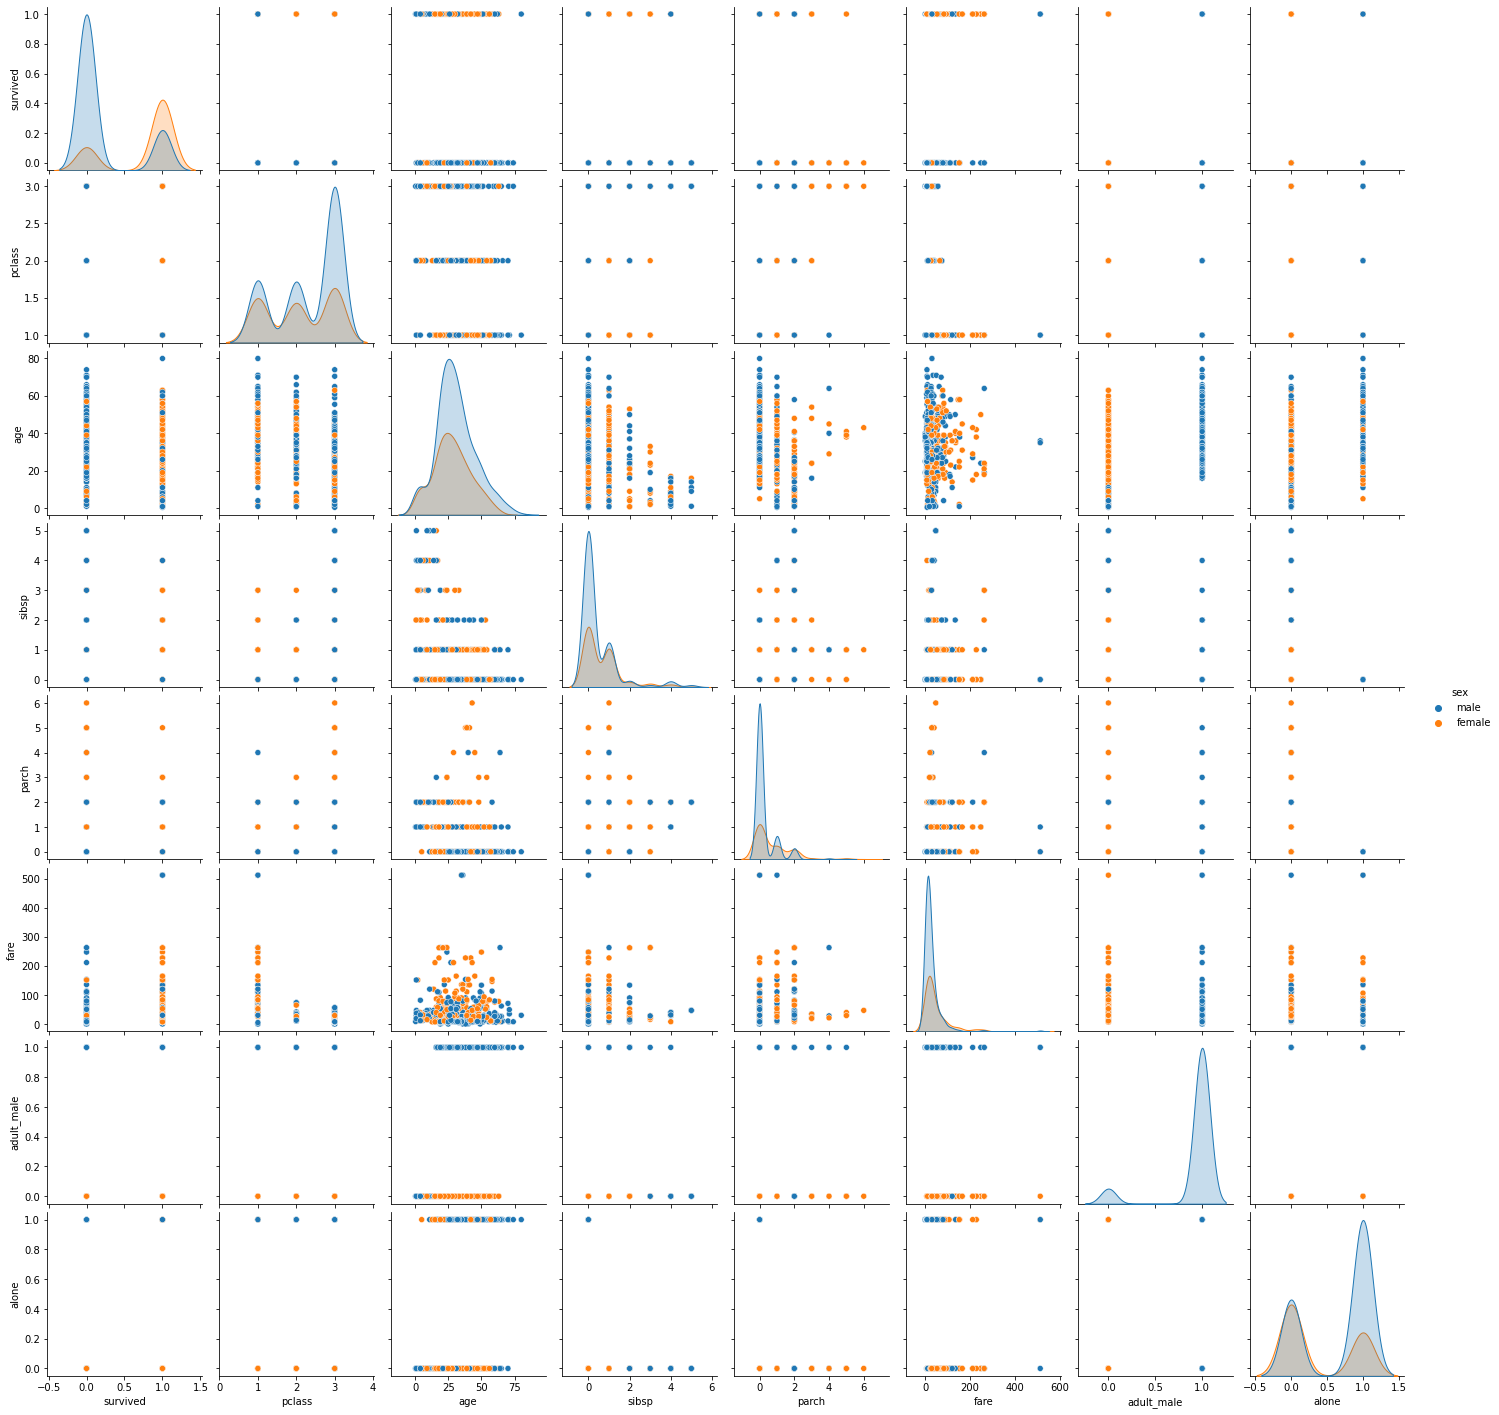

In [21]:
sns.pairplot(dataset, hue='sex')

#### Count of passengers who survived according to gender

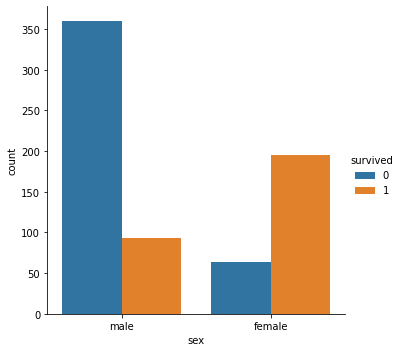

In [22]:
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = dataset)

Majority of the female members survived